### Import thư viện

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Đọc dữ liệu từ file csv

In [5]:
df = pd.read_csv("./SampleSuperstore.csv",encoding = "ISO-8859-1")

## Tiền xử lý

**In 5 dòng đầu tiên của dữ liệu**

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Thông tin số dòng và số cột**

In [7]:
df.shape

(9994, 21)

**Mô tả dữ liệu**

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Thông tin cột**

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Kiểu dữ liệu của từng cột**

In [10]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

**Số giá trị null của từng cột**

In [11]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Loại bỏ các dòng có xuất hiện it nhất 1 giá trị null trong dataframe**

Do dữ liệu có hơn 20000 dòng nên việc loại bỏ các giá trị null rơi vào khoảng 2000 dòng không ảnh hưởng nhiều

In [12]:
df.dropna(inplace=True)

Kiểm tra lại dataframe

In [13]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
df.shape

(9994, 21)

**Loại bỏ cột không cần thiết**

Các cột bị loại bỏ:
- Cột `discount_price__currency` và `price_detail__currency` đều chỉ có 1 giá trị duy nhất là `INR`
- Cột `is_wishlisted` có 1 giá trị duy nhất là `False`
- Cột `discount_price__price_string` có dữ liệu kiểu string và được tổng hợp từ 2 cột `discount_price__currency` và `discount_price__amount` nên ta sẽ loại bỏ cột này. Tương tự với cột `price_detail__price_string`
- Cột `id`, `url` không có thông tin hữu ích cho việc trực quan hóa và mô hình hóa
- Cột `avg_rating_recent` có giá trị dữ liệu từng dòng bằng với cột `rating` nên ta chọn loại bỏ cột `avg_rating_recent` để tránh dư thừa cột 

loai bo cot country vi chi co 1 gia tri duy nhat la United Stated

In [15]:
a = df.groupby(['Country'])['Country'].count()
a

Country
United States    9994
Name: Country, dtype: int64

In [16]:
print(df["discount_price__currency"].unique())
print(df["price_detail__currency"].unique())
print(df['is_wishlisted'].unique())

KeyError: 'discount_price__currency'

In [ ]:
print(df['avg_rating_recent'].equals(df['rating']))

In [ ]:
unused_columns = [
    'discount_price__currency', 
    'price_detail__currency',
    'discount_price__price_string',
    'price_detail__price_string',
    'is_wishlisted',
    'url',
    'id',
    'avg_rating_recent']

df.drop(columns=unused_columns, inplace=True)
df.columns

**Chuyển về kiểu dữ liệu datetime**

Áp dung cho 2 cột `created` và `published_time`

In [ ]:
df["created"] = pd.to_datetime(df["created"])
df["published_time"] = pd.to_datetime(df["published_time"])

Kiểu tra kiểu dữ liệu

In [ ]:
df.dtypes

Cách trích xuất thông tin từ dữ liệu datetime

In [ ]:
df['published_time'].dt.hour

**Chuyển giá trị tiền tệ từ INR thành USD**

USD là đơn vị tiền tệ phổ biến nên chuyển từ INR sang USD để có thể hiểu rõ hơn. Tại thời điểm thực hiện, 1 INR bằng khoảng 0.012 USD

In [ ]:
df['discount_price__amount'] = df['discount_price__amount'].apply(lambda x: x * 0.012)
df['price_detail__amount'] = df['price_detail__amount'].apply(lambda x: x * 0.012)

In [ ]:
df.head()

## Hàm tiện ích ##

In [ ]:
# Helper Function For Visualization
def Viz_Bar(df1 , cx , cy ,t='',rot="horizontal" , x=True ):
    if(x is False):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        ax.barh(df1.head(10)[cx], df1.head(10)[cy], align='center', color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        ax.set_yticks(df1.head(10)[cx], labels=df1.head(10)[cx])
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel(cy)
        ax.set_title(t)
        plt.xticks(rotation = rot)
        plt.show()
    else :
        plt.bar(df1.head(10)[cx] ,df1.head(10)[cy] ,  color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        plt.xlabel(cx)
        plt.ylabel(cy)
        plt.title(t)
        plt.xticks(rotation = rot)
        plt.show()
        

## Đưa ra câu hỏi và câu trả lời

**Câu 4:** Hãy phân tích về các loại sản phẩm được bán ở siêu thị này dựa trên các yếu tố: sales, profit, quantity,...

**Câu 5:** Hãy phân tích về các sự kiện discount của cửa hàng và mối liên hệ giữa Discount và các yếu tố khác.

**Câu 6:** Quan sát và đánh giá về khách hàng.

**Câu 7:** Phân tích mối quan hệ giữa khách hàng và khu vực sinh sống.


### Câu 4: Hãy phân tích về các loại sản phẩm được bán ở siêu thị này dựa trên các yếu tố: sales, profit, quantity,...

Để trả lời câu hỏi này, ta sẽ chia ra trả lời 3 câu hỏi nhỏ, dựa trên 3 yếu tố là: Sales, Profit, Quantity.

#### 1. Sales

Tính tổng số lượng các sản phẩm đã bán dựa theo Category và Sub-category.

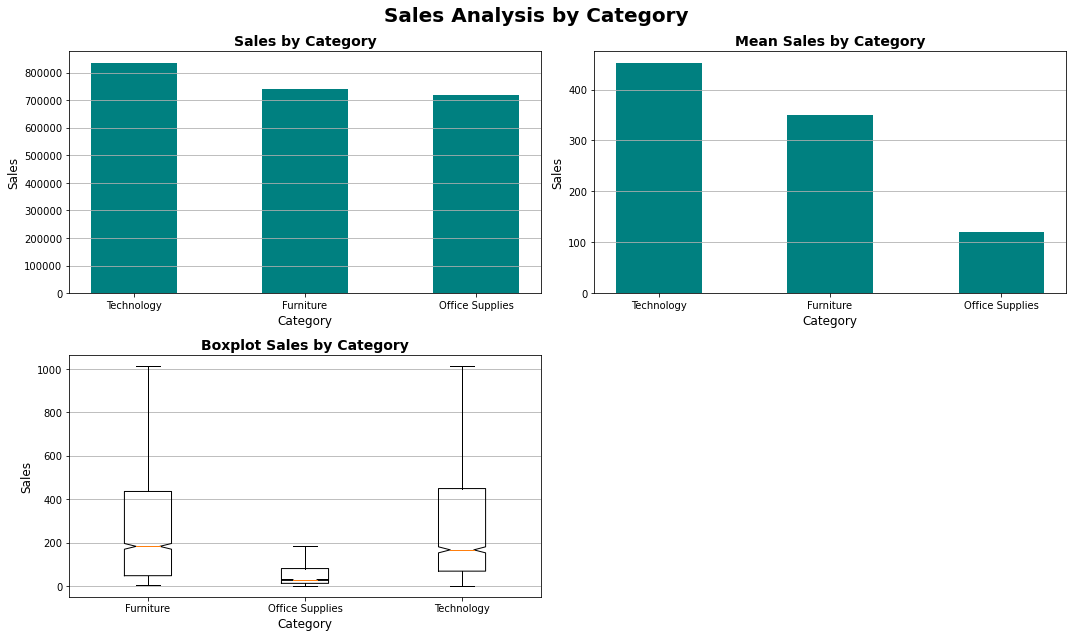

In [ ]:
# Tính tổng giá trị sales theo Category
# Gộp nhóm theo Category để tạo bảng tính tổng và lưu vào dataframe
sales_per_category = df[['Category', 'Sales']].groupby('Category').sum().reset_index()
sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Category và lưu vào dataframe
mean_sales_per_category = df[['Category', 'Sales']].groupby('Category').mean().reset_index()
mean_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Sales Analysis by Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(sales_per_category['Category'], sales_per_category['Sales'], width=0.5, color='teal')
axs[0, 0].set_title('Sales by Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Category', fontsize=12)
axs[0, 0].set_ylabel('Sales', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_sales_per_category['Category'], mean_sales_per_category['Sales'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Sales by Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Category', fontsize=12)
axs[0, 1].set_ylabel('Sales', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Category'] == category]['Sales'] for category in df['Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Sales by Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Category', fontsize=12)
axs[1, 0].set_ylabel('Sales', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Category'].unique())
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

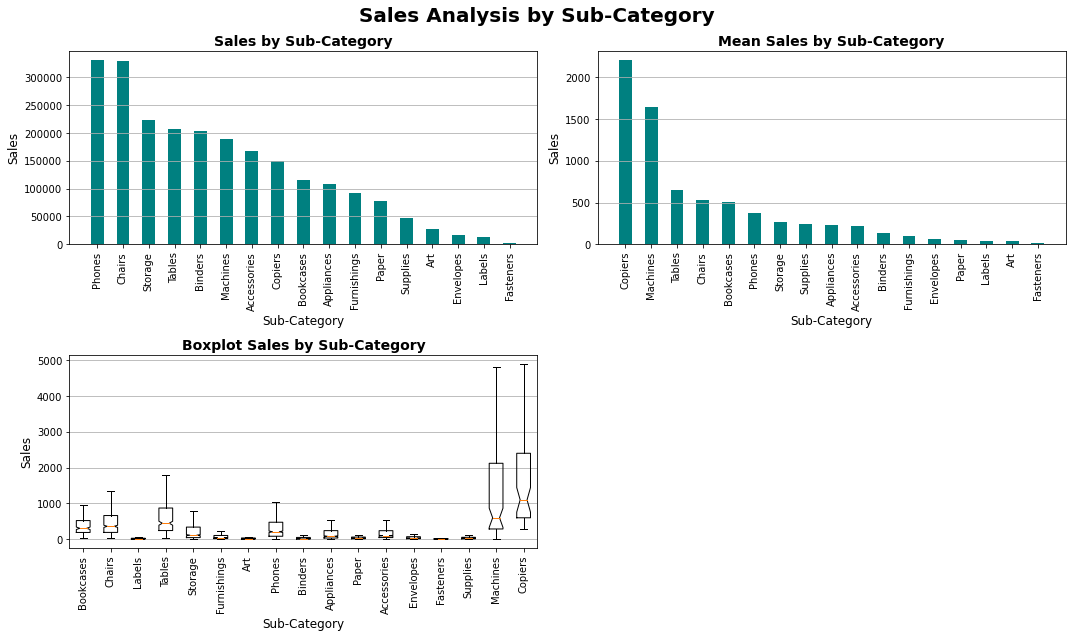

In [ ]:
# Tính tổng giá trị sales theo Category
# Gộp nhóm theo Sub-Category để tạo bảng tính tổng và lưu vào dataframe
sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').sum().reset_index()
sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Sub-Category và lưu vào dataframe
mean_sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').mean().reset_index()
mean_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Sales Analysis by Sub-Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(sales_per_sub_category['Sub-Category'], sales_per_sub_category['Sales'], width=0.5, color='teal')
axs[0, 0].set_title('Sales by Sub-Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Sub-Category', fontsize=12)
axs[0, 0].set_ylabel('Sales', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10, rotation=90)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_sales_per_sub_category['Sub-Category'], mean_sales_per_sub_category['Sales'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Sales by Sub-Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Sub-Category', fontsize=12)
axs[0, 1].set_ylabel('Sales', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10, rotation=90)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Sub-Category'] == sub_category]['Sales'] for sub_category in df['Sub-Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Sales by Sub-Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Sub-Category', fontsize=12)
axs[1, 0].set_ylabel('Sales', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Sub-Category'].unique(), rotation=90)
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

#### 2. Profit

Tính lợi nhuận (Profit) các sản phẩm đã bán dựa theo Category và Sub-category. Cách làm tương tự như trên.

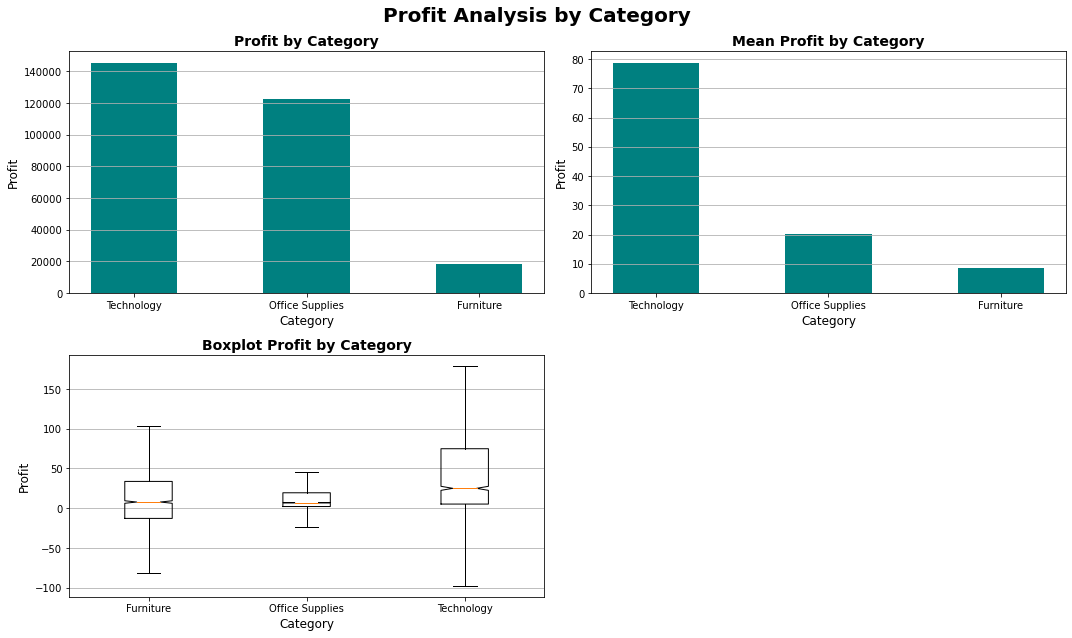

In [ ]:
# Tính tổng giá trị Profit theo Category
# Gộp nhóm theo Category để tạo bảng tính tổng và lưu vào dataframe
profit_per_category = df[['Category', 'Profit']].groupby('Category').sum().reset_index()
profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Category và lưu vào dataframe
mean_profit_per_category = df[['Category', 'Profit']].groupby('Category').mean().reset_index()
mean_profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Profit Analysis by Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(profit_per_category['Category'], profit_per_category['Profit'], width=0.5, color='teal')
axs[0, 0].set_title('Profit by Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Category', fontsize=12)
axs[0, 0].set_ylabel('Profit', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_profit_per_category['Category'], mean_profit_per_category['Profit'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Profit by Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Category', fontsize=12)
axs[0, 1].set_ylabel('Profit', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Category'] == category]['Profit'] for category in df['Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Profit by Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Category', fontsize=12)
axs[1, 0].set_ylabel('Profit', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Category'].unique())
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

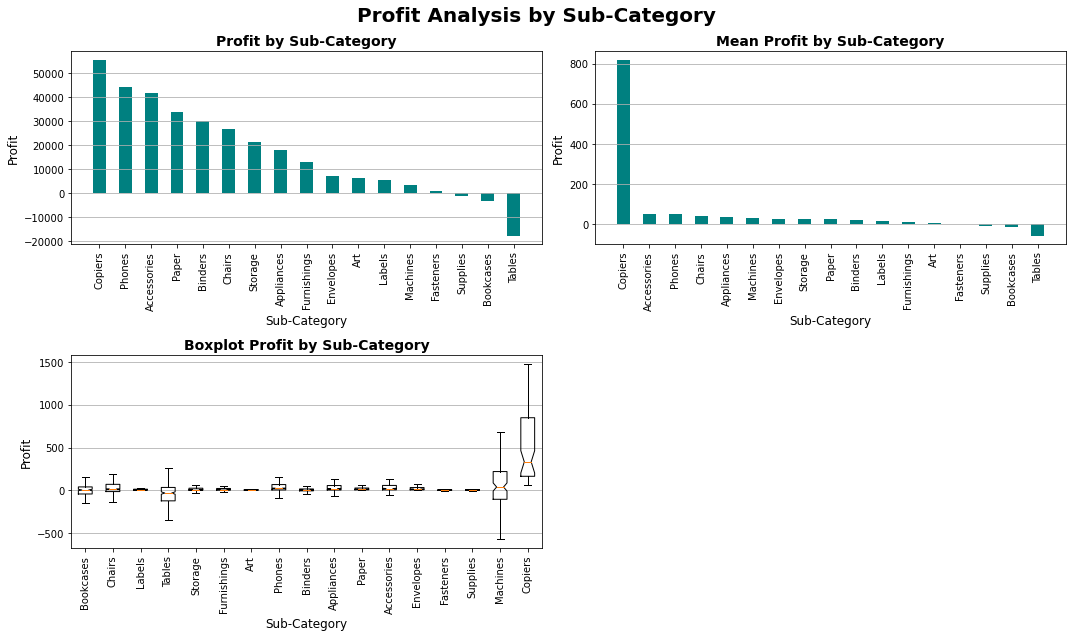

In [ ]:
# Tính tổng giá trị Profit theo Sub-Category
# Gộp nhóm theo Sub-Category để tạo bảng tính tổng và lưu vào dataframe
profit_per_Sub_Category = df[['Sub-Category', 'Profit']].groupby('Sub-Category').sum().reset_index()
profit_per_Sub_Category.sort_values(by='Profit', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Sub-Category và lưu vào dataframe
mean_profit_per_Sub_Category = df[['Sub-Category', 'Profit']].groupby('Sub-Category').mean().reset_index()
mean_profit_per_Sub_Category.sort_values(by='Profit', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Profit Analysis by Sub-Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(profit_per_Sub_Category['Sub-Category'], profit_per_Sub_Category['Profit'], width=0.5, color='teal')
axs[0, 0].set_title('Profit by Sub-Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Sub-Category', fontsize=12)
axs[0, 0].set_ylabel('Profit', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_profit_per_Sub_Category['Sub-Category'], mean_profit_per_Sub_Category['Profit'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Profit by Sub-Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Sub-Category', fontsize=12)
axs[0, 1].set_ylabel('Profit', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Sub-Category'] == Sub_Category]['Profit'] for Sub_Category in df['Sub-Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Profit by Sub-Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Sub-Category', fontsize=12)
axs[1, 0].set_ylabel('Profit', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Sub-Category'].unique(),rotation=90)
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

### Câu 6: Đánh giá và phân tích về khách hàng


**Top khách hàng theo Sales**


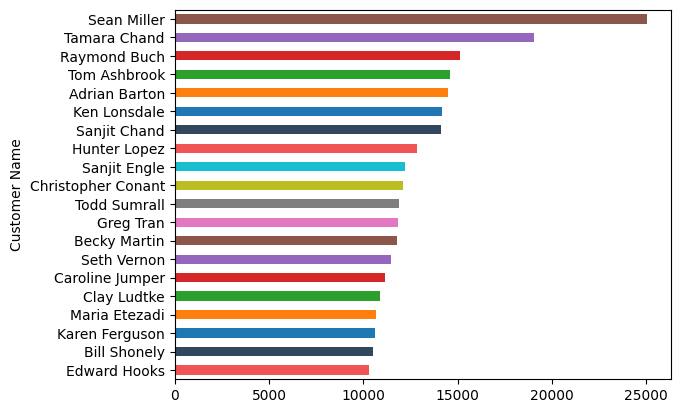

In [ ]:
colors = color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

**Phần trăm lợi nhuận của Top 9 khách hàng**

In [ ]:
customers = list(df['Customer Name'].value_counts()[:10].index)
filters = df['Customer Name'].isin(customers)
A = df[filters]

In [ ]:
#  Zuschuss Carroll is in the top 10 but her/his profit is negative
A = A[A['Customer Name'] != 'Zuschuss Carroll']
del customers[-2]

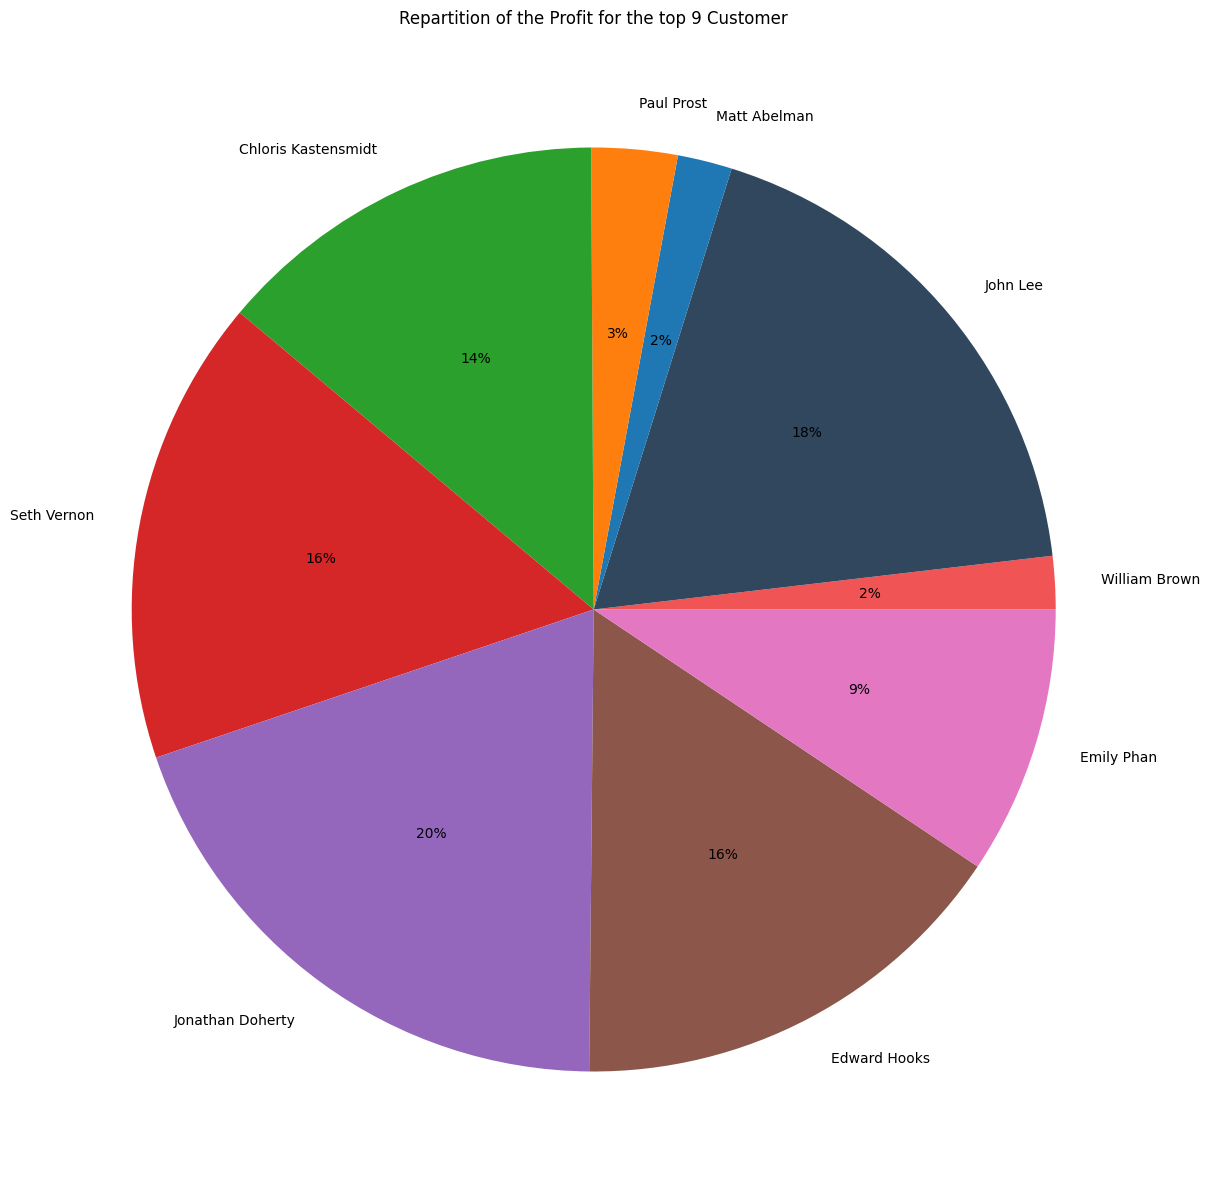

In [ ]:
plt.figure(figsize=(15,15))
values = A.groupby('Customer Name')['Profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the top 9 Customer")
plt.show()

**Phân khúc bán hàng**

In [ ]:
segments_info = df.groupby("Segment").sum().reset_index()
segments_info

C:\Users\ACER\AppData\Local\Temp\ipykernel_15196\4251352769.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segments_info = df.groupby("Segment").sum().reset_index()


,Segment,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,25581329,288878609,1.161401e+06,19521,820.91,134119.2092
1,Corporate,15504734,164536330,7.061464e+05,11608,477.85,91979.1340
2,Home Office,8858952,98157713,4.296531e+05,6744,262.33,60298.6785


In [ ]:
segments_info[['Segment' , 'Sales']]

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


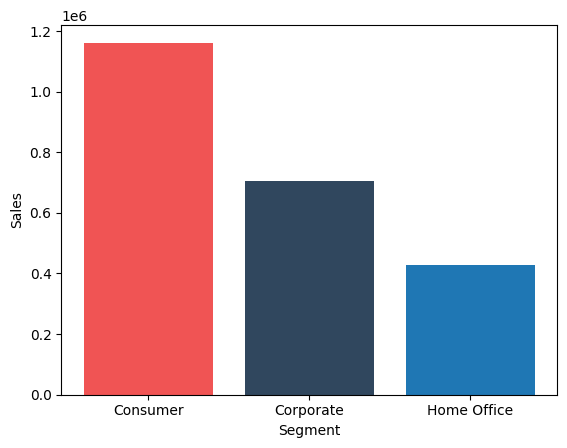

In [ ]:
Viz_Bar(segments_info , 'Segment' ,'Sales')

**Lợi nhuận khách hàng**

In [ ]:
segments_info[['Segment' , 'Profit']]

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


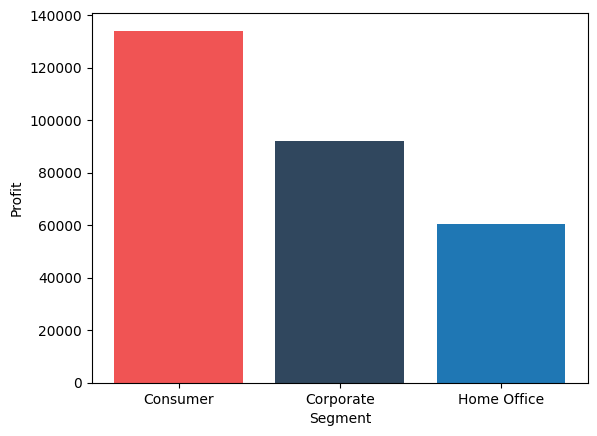

In [ ]:
Viz_Bar(segments_info , 'Segment' ,'Profit')

### Câu 7: Phân tích mối quan hệ giữa khách hàng và khu vực sinh sống. ###

**Số lượng khách hàng và trung bình Sales và Profit theo khu vực sinh sống**

In [33]:
data_3= df.groupby(['Region','State'], as_index=False).agg(
                                number_order= ('Order ID','count'),
                                Số_lượng_khách_hàng= ('Customer ID','count'),
                                total_sale= ('Sales','sum'), 
                                total_profit= ('Profit','sum'))
data_3['Trung bình Sale']= data_3['total_sale']/data_3['Số_lượng_khách_hàng']
data_3['Trung bình Profit']= data_3['total_profit']/data_3['Số_lượng_khách_hàng']
data_3.head(2)

,Region,State,number_order,Số_lượng_khách_hàng,total_sale,total_profit,Trung bình Sale,Trung bình Profit
0,Central,Illinois,492,492,80166.101,-12607.8870,162.939230,-25.625787
1,Central,Indiana,149,149,53555.360,18382.9363,359.431946,123.375411


In [34]:
col_list= ['Trung bình Sale','Trung bình Profit']
def customer_1(data_3,col):
    fig= px.scatter(data_3, x="Số_lượng_khách_hàng", y=col, 
                   size='number_order',color="Region",
                 hover_name="State", log_x=True, size_max=80, 
                   title= f'Số lượng khách hàng và {col} theo bang')
    return fig

In [35]:
customer_fig_1=[]
for col in col_list:
    customer_fig_1.append(customer_1(data_3,col))

In [36]:
customer_fig_1[0]

In [37]:
customer_fig_1[1]